# SciPy

SciPy build on top of NumPy to provide common tools for scientific programming. For example, it providees, amongst others:

* linear algebra
* numerical integration
* interpolation
* optimiation
* distributions and random number generators
* signal processing
* etc...

Here's some of the highlights of the package (there are many many more features - google it)


## SciPy vs NumPy

SciPy is apackage that contains various tools built on top of NumPy using it's array data type and elated functionality.

When we import scipy we get numpy, however it's more common to explicitly import it.

What is useful on scipy is functionality in it's subpackages, for example:

`scipy.optimize`, `scipy.integrate`, `scipy.stats`, etc.

## Statistics

The `scipy.stats` subpackage supplies

* numerous random vaiable objects (densities, cumulative distributions, random sampling, etc)
* some estimation procedures
* some statistical tests


### Random Variables and Distributions

Recall `numpy.random` provies functions for generation random variables:

In [1]:
import numpy as np

np.random.beta(5, 5, size=3)

array([0.79784437, 0.23796164, 0.58849165])

This generates a draw from the distribution below when `a, b = 5, 5`

$$f(x;a, b) = {{x^{(a-1)}(1-x)^{(b-1)}} \over {\int_{0}^{1} u^{(a-1)}u^{(b-1)}du}} \quad \quad (0 \le x \le 1)$$ 

This function is the probability density function (pdf) of the beta distribution.

Sometimes we need access to the density, or the cumulative distribution function (cdf), the quantiles, etc

For this we can use `scipy.stats`, which provides all the functionality as well as random number generation in a single consistant interface

Here's an example of usage:

In [2]:
from scipy.stats import beta
import matplotlib.pyplot as plt

q = beta(5,5)
obs = q.rvs(2000)
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(obs, bins=40, normed=True)
ax.plot(grid, q.pdf(grid), 'k-', linewidth=2, label='pdf')
ax.plot(grid, q.cdf(grid), 'r-', linewidth=2, label='cdf')
ax.plot(grid, q.ppf(grid), 'g-', linewidth=2, label='ppf')
ax.legend()
plt.show()


In this code we created a so=call `rv-frozen` object, via the call `q = beta(5,5)`

The "frozen" part of the notation implies that `q` represent a particular distribution with a particular set of parameters.

Once we've done this we can then generate random numbers, evaluate the density, etc. all from this fixed distribution. 

In [3]:
q.cdf(0.4)

0.26656768000000003

In [4]:
q.pdf(0.4)

2.0901888000000013

In [5]:
q.ppf(0.8)  # Quantile (inverse cdf) function

0.6339134834642708

In [6]:
q.mean()

0.5

The general syntax for reating these objects is

`identifier = scipy.stats.distribution_name(shape_parameters)`

Where `distribution_name` is one of the distribution names in `scipy.stats`

There are also two keyword arguments, `loc` and `scale` that can be added:

`identifier = scipy.stats.distribution_name(shape_parameters, loc=c, scale=d)`

These transform the orginal random variable $X$ into $Y = c + dX$

The methods, `rvs`, `pdf`, `cdf`, etc are all transformed accordingly. 

There is also an alternative way of calling these methods. The previous code could be called as follows

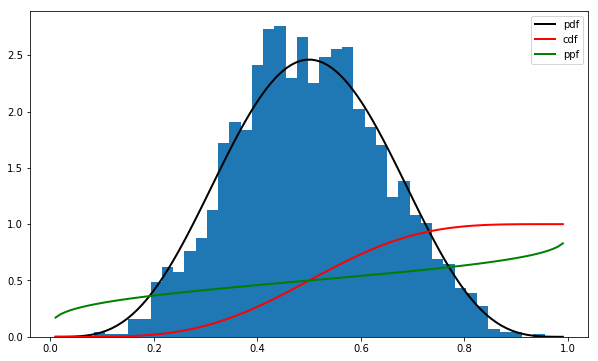

In [7]:
from scipy.stats import beta
import matplotlib.pyplot as plt

obs = beta.rvs(5, 5, size=2000)     # using the beta object directly
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots(figsize=(10,6))
ax.hist(obs, bins=40, normed=True)
ax.plot(grid, beta.pdf(grid, 5, 5), 'k-', linewidth=2, label='pdf')      # using the beta object directly
ax.plot(grid, beta.cdf(grid, 5, 5), 'r-', linewidth=2, label='cdf')      # using the beta object directly
ax.plot(grid, beta.ppf(grid, 5, 5), 'g-', linewidth=2, label='ppf')      # using the beta object directly
ax.legend()
plt.show()

#### There are other goodies in scipy.stats

There are a variety of statistical functions in `scipy.stats`

For example `scipy.stats.linregress` implements simple linear regression.

In [8]:
from scipy.stats import linregress

x = np.random.randn(200)
y = 2 * x + 0.1 * np.random.randn(200)
gradient, intercept, r_value, p_value, std_err = linregress(x, y)
gradient, intercept

(1.988986046841961, -0.0021577967171208523)

## Roots and Fixed Points

A *root* of a real function $f$ on $[a,b]$ is an $x \in [a,b]$ such that $f(x) = 0$

For example , if we plot the function

$$f(x)=\sin(4(x−1/4))+x+x^{20}−1$$

with $x \in [0,1]$, we get

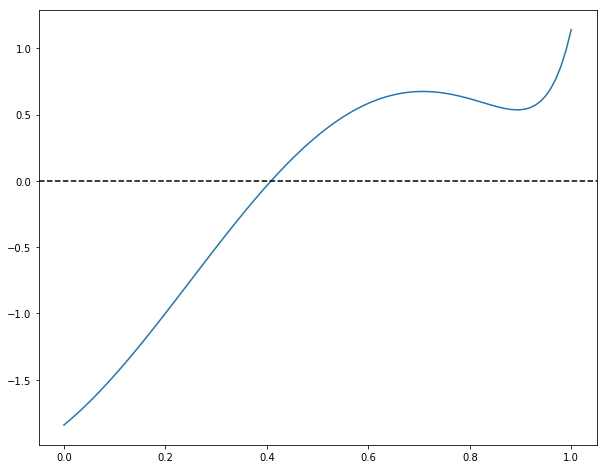

In [9]:
f = lambda x : np.sin(4*(x-1/4)) + x + x**20 - 1
x = np.linspace(0,1,100)

plt.figure(figsize=(10,8))
plt.plot(x, f(x))
plt.axhline(ls='--' , c='k')
plt.show()

The unique root is approximately 0.408

Here's some numerical techniques for finding roots

### Bisection

One of the most common algorithms for numerical root finging is *bisection*.

Basically bisect over the interval, if f is grater than 0, bisect smaller interval other bisect larger interval, and so on.

Here's a basic implementation, that works on all sufficiently well behaved functions such that $f(a) < 0 < f(b)$

In [10]:
def bisect(f, a, b, tol=10e-5):
    
    lower, upper = a, b
    
    while (upper - lower) > tol:
        middle = 0.5 * (upper+lower)
        if f(middle) > 0:
            lower, upper = lower, middle
        else:
            lower, upper = middle, upper
            
    return 0.5*(upper+lower) 

bisect(f, 0, 1)

0.408294677734375

Scipy has it's own implementation of the bisect function:

In [11]:
from scipy.optimize import bisect

bisect(f, 0, 1)

0.4082935042806639

### The Newton-Raphson Method

Another very common root-finding algorithm is the Newton-Raphson Method (`scipy.optimize.newton`)

Unlike bisection this method uses local slope information.

* When the function is well-behaved, the Newton-Raphson method is faster than bisection
* When the function is less well-behvaed, the Newton-Raphson method may not converge

Here an example of an instability of using Newton-Raphson on our function


In [12]:
from scipy.optimize import newton

newton(f, 0.2)

0.4082935042793568

In [13]:
newton(f, 0.7, maxiter=50)

0.7001700000000282

In [14]:
newton(f, 0.9, maxiter=50)

-1.0264575851993918

It fails to converge at initial starting point of 0.7 as well as 0.9


However, using the python `timeit` magic we can see: 

In [15]:
%timeit bisect(f, 0, 1)

114 µs ± 4.85 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [16]:
%timeit newton(f, 0.2)

30.1 µs ± 1.49 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


We see that `newton` can be much faster than `bisect`.

### Hybrid Methods

So far we have seen that the Newton-Raphson methos fast, but not robust, whereas the bisection method is robust but relatively slow.

This illustrates a general principle

* If you have specific knowledge about your function, you might be able to exploit it to generate efficiency
* If not, then the algorithm choice involves a trade-off between speed of convergence and robustness

In practice, most default algorithms for root finding, optimization and fixed points use hybrid methods

These methods typically combine a fast method with a robust method in the following manner:

* Attempt to use a fast method
* Check diagnostics
* If diagnostics are bad, then switch to a more robust algorithm

In `scipy.optimize` he function `brentq` is a hybrid method and a good default


In [17]:
from scipy.optimize import brentq

brentq(f, 0, 1)

0.40829350427936706

In [18]:
%timeit brentq(f, 0, 1)

32.1 µs ± 1.63 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Here the correct solution is found and it is almost as fast as N-R 

### Mutivariate root finding

Use `scipy.optimize.fsolve` - a wrapper for ahybrid method in MINPACK 

### Fixed points

SciPy has a function for finding (scalar) fixed points too

A fixed point is the value $x$ such that $f(x) = x$

In [19]:
from scipy.optimize import fixed_point

fixed_point(lambda x: x**2, 10.0)   # 10.0 is the initial guess

array(1.)

If you don't get good results, you can always revert to `brentq`, since the fixed point of a function $f$ is the root of $g(x) := x - f(x)$

In [20]:
from scipy.optimize import brentq

brentq(lambda x : x - x**2, 0.01, 10)

1.0

## Optimization

Most numerical packages only provide functions for *minimization*

Maximization can be performed by recalling that the maximizer of a function $f$ on domain $D$ is just the minimizer of $-f$ on $D$ 

Minimization is closely related to root finding. For smooth functions, interior optima correspond to roots of the first derivative.

The speed/robustness trade-offs described earlier applies to minimizations aswell.

Unless you have some prior knowledge about $f$ you can exploit, is best to use hybrid methods.

For constraint, univariate (i.e. scalar) minimization, a good hybrid option is `fminbound`

In [24]:
from scipy.optimize import fminbound

fminbound(lambda x: x**2, -1, 2)  # Search in [-1, 2]

0.0

### Multivariate Optimization

There are a number of optimizes to use (google them). These include

* `minimize`
* `fmin`
* `fmin_powell`
* `fmin_bfgs`
* etc, etc, etc

See the documentation for details


## Integration

Most numerical integration ethods work by computing the integral of an approximating polynomial.

The resulting error depends on how well the poluynomial fits the integrand.

The relevant package is `scipy.integrate`

A good default for univariate integration is `quad`

In [25]:
from scipy.integrate import quad

integral, error = quad(lambda x: x**2, 0, 1)
print(integral)
print(error)

0.33333333333333337
3.700743415417189e-15


Read the docs on `quad` - it uses a very standard numerical integration routing in the FORTRAN library QUADPACK

The are other option for univariate integration, for example `fixed_quad` which is fast and works well in for loops.

There are also methods for multivariate integration.

Google it and read the docs.

## Linear Algebra

NumPy provides a module for linear algebra, `linalg`

SciPy also provides a module for linear algebra with the same name. 

The SciPy version is not an exact superset of the NumPy version, but overall has more functionality.

Goole it and read the docs.

## Exercises

### Exercise 1

Previously we discussed the concept of recursive function calls.

Write a recursive implementation of the bisection function described above, which we repeat here for convenience

```python
def bisect(f, a, b, tol=10e-5):
    """
    Implements the bisection root finding algorithm, assuming that f is a
    real-valued function on [a, b] satisfying f(a) < 0 < f(b).
    """
    lower, upper = a, b

    while upper - lower > tol:
        middle = 0.5 * (upper + lower)
        # === if root is between lower and middle === #
        if f(middle) > 0:
            lower, upper = lower, middle
        # === if root is between middle and upper  === #
        else:              
            lower, upper = middle, upper

    return 0.5 * (upper + lower)
```

In [27]:
def bisect(f, a, b, tol=10e-5):
    
    lower, upper = a, b
    
    if (upper - lower) < tol:
        return 0.5 * (upper + lower)
    else:
        middle = 0.5 * (upper + lower)
        print(f'Current middle is {middle}')
        if f(middle) > 0:
            bisect(f, lower, middle)
        else:
            bisect(f, middle, upper)
            

In [28]:
f = lambda x: np.sin(4 * (x - 0.25)) + x + x**20 - 1
bisect(f,0,1)

Current middle is 0.5
Current middle is 0.25
Current middle is 0.375
Current middle is 0.4375
Current middle is 0.40625
Current middle is 0.421875
Current middle is 0.4140625
Current middle is 0.41015625
Current middle is 0.408203125
Current middle is 0.4091796875
Current middle is 0.40869140625
Current middle is 0.408447265625
Current middle is 0.4083251953125
Current middle is 0.40826416015625
